In [88]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.express as px
import scipy.stats as stats
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import plot_roc_curve

In [3]:
df=pd.read_csv('cardio_train.csv',sep=';')

In [4]:
df.shape

(2000, 13)

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


###### With this chart, I check whether there is missing data.

<AxesSubplot:>

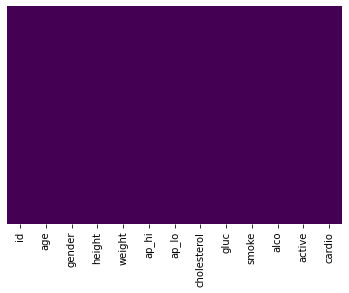

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

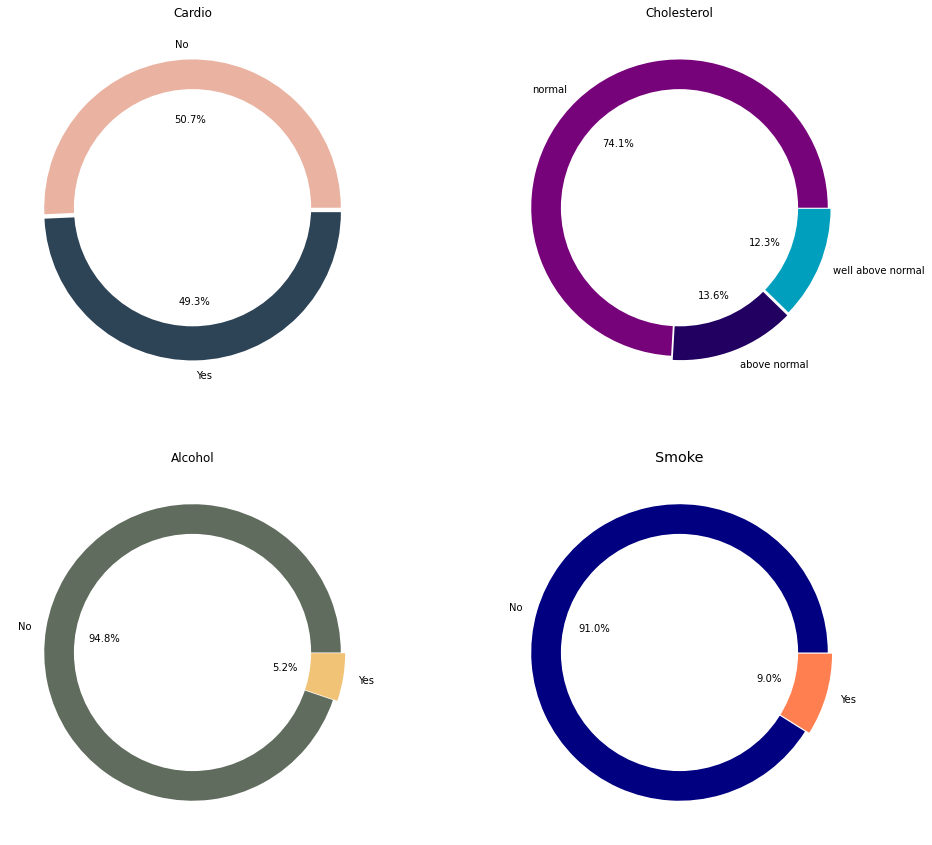

In [7]:
plt.figure(figsize=(16, 15))
plt.subplot(2, 2, 1)
plt.pie(x=df['cardio'].value_counts(),labels=['No',"Yes"],explode=[0,0.03],shadow=False,autopct='%1.1f%%',colors=['#EAB2A0','#2D4356'])
plt.title('Cardio')
circle = plt.Circle(xy=(0,0),radius=0.8,facecolor = 'white')
plt.gca().add_artist(circle)


plt.subplot(2, 2, 2)
plt.pie(x=df['cholesterol'].value_counts(),labels=['normal','above normal',"well above normal"],explode=[0,0.03,0.02],shadow=False,autopct='%1.1f%%',colors=['#77037B','#210062','#009FBD'])
plt.title('Cholesterol')
circle = plt.Circle(xy=(0,0),radius=0.8,facecolor = 'white')
plt.gca().add_artist(circle)


plt.subplot(2, 2, 3)
plt.pie(x=df['alco'].value_counts(),labels=['No',"Yes"],explode=[0,0.03],shadow=False,autopct='%1.1f%%',colors=['#606C5D','#F1C376'])
plt.title('Alcohol')
circle = plt.Circle(xy=(0,0),radius=0.8,facecolor = 'white')
plt.gca().add_artist(circle)

plt.subplot(2, 2, 4)
plt.style.use('ggplot')
plt.pie(x=df['smoke'].value_counts(),labels=['No',"Yes"],explode=[0,0.03],shadow=False,autopct='%1.1f%%',colors=['#000080','#FF7F50'])
plt.title('Smoke')
circle = plt.Circle(xy=(0,0),radius=0.8,facecolor = 'white')
plt.gca().add_artist(circle)

##### When we look at the first graph, we can see that 50.7% of the people 1014 people) do not have cardiovascular heart disease. 

##### When we look at the second graph, we can see that 74.1% of the patients (1482 people) have normal cholesterol levels, 13.6% (272 people) above normal and 12.3% (246 people) well above normal cholesterol levels

##### When we look at the third graph, we can see that 94.8% (1896 people) of the patients do not use alcohol.

##### When we look at the fourth graph, we can observe that 91% of the patients (1821 people) do not smoke.

<AxesSubplot:xlabel='age', ylabel='count'>

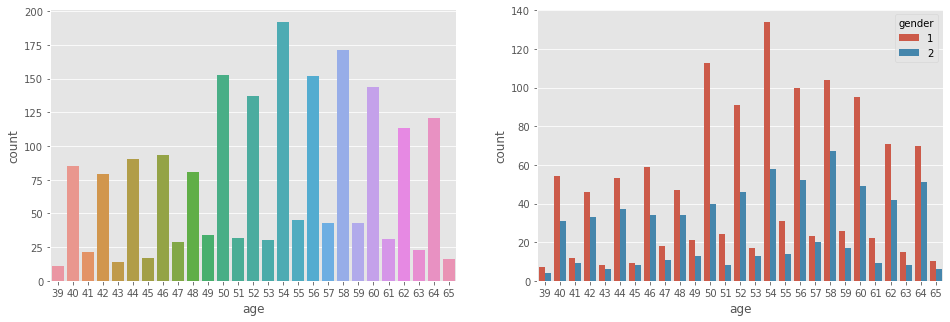

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
sns.countplot(x='age',data=df)

plt.subplot(1, 2, 2)
sns.countplot(x='age',hue='gender',data=df)

In [9]:
def cholesterol_transformation(value):
    if value == 1:
        return 'normal'
    elif value == 2:
        return 'above normal'
    elif value == 3:
        return 'well above normal'
    else:
        return value

In [10]:
df['cholesterol'] = df['cholesterol'].map(cholesterol_transformation)

In [11]:
def glucose_transformation(value):
    if value == 1:
        return 'normalg'
    elif value == 2:
        return 'above normalg'
    elif value == 3:
        return 'well above normalg'
    else:
        return value

In [12]:
df['gluc'] = df['gluc'].map(glucose_transformation)

In [13]:
def gender_transformation(value):
    if value == 1:
        return 1
    elif value == 2:
        return 0
    else:
        return value

In [14]:
df['gender'] = df['gender'].map(gender_transformation)

In [15]:
cholesterol_=pd.get_dummies(df['cholesterol'],drop_first=True)

In [16]:
gluc_=pd.get_dummies(df['gluc'],drop_first=True)

In [17]:
df=pd.concat([df,cholesterol_,gluc_],axis=1)

In [18]:
df.drop(['cholesterol','gluc'],axis=1,inplace=True)

# Splitting the data into training and testing sets, and standardizing it.

In [19]:
columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

###### I only applied standardization to continuous data here, as the measurement units of categorical variables are not expressed in numbers, so there is no need for standardization.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

In [21]:
X=df.drop(['cardio','id'],axis=1)
y=df['cardio']

In [22]:
from sklearn.model_selection import train_test_split

###### We split the data into training and testing sets to prevent overfitting. Additionally, the cross-validation method can also be applied.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=101)

# Logistic Regresssion

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logmodel=LogisticRegression(solver='liblinear')
logmodel=logmodel.fit(X_train,y_train)

In [26]:
predictions=logmodel.predict(X_test)

In [27]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[259  71]
 [109 221]]


              precision    recall  f1-score   support

           0       0.70      0.78      0.74       330
           1       0.76      0.67      0.71       330

    accuracy                           0.73       660
   macro avg       0.73      0.73      0.73       660
weighted avg       0.73      0.73      0.73       660



# XGBOOST

In [28]:
xgb_model=XGBClassifier().fit(X_train,y_train)

In [29]:
y_predXGB=xgb_model.predict(X_test)

In [30]:
print(confusion_matrix(y_test,y_predXGB))
print(classification_report(y_test,y_predXGB))

[[241  89]
 [109 221]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       330
           1       0.71      0.67      0.69       330

    accuracy                           0.70       660
   macro avg       0.70      0.70      0.70       660
weighted avg       0.70      0.70      0.70       660



In [31]:
xgb_params = {
        'n_estimators': [100, 500,1000], #This parameter specifies the number of estimators used in the algorithm.A higher number increases the model's complexity. However, excessive complexity can lead to overfitting issues. Typically, this value is chosen between 100 and 1000.
        'subsample': [0.6, 0.8, 1.0],#This parameter defines the percentage of the training data to be used for each individual estimator.This can help control overfitting.
        'max_depth': [3, 4, 5,6,11], #This parameter determines the maximum depth of the tree structure for each estimator. Deeper trees can capture more complex relationships but also increase the risk of overfitting. 
        'learning_rate': [0.1,0.01,0.02,0.05]} # This parameter sets the learning rate for each estimator. A lower learning rate can contribute to a more stable learning process but might require more estimators.

In [33]:
xgb = XGBClassifier()
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)
xgb_cv_model.fit(X_train, y_train)
xgb_cv_model.best_params_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.6}

In [34]:
xgb = XGBClassifier(learning_rate = 0.05, 
                    max_depth = 6,
                    n_estimators = 100,
                    subsample = 0.6)

In [35]:
xgb_tuned =  xgb.fit(X_train,y_train)
y_pred_cv_xgb= xgb_tuned.predict(X_test)

In [36]:
print(confusion_matrix(y_test,y_pred_cv_xgb))
print(classification_report(y_test, y_pred_cv_xgb))
accuracy_score(y_test, y_pred_cv_xgb).round(2)

[[259  71]
 [104 226]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.75       330
           1       0.76      0.68      0.72       330

    accuracy                           0.73       660
   macro avg       0.74      0.73      0.73       660
weighted avg       0.74      0.73      0.73       660



0.73

# Lightgbm

In [37]:
from lightgbm import LGBMClassifier

In [38]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)
y_pred_lgbm= lgbm_model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 656, number of negative: 684
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 1340, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489552 -> initscore=-0.041797
[LightGBM] [Info] Start training from score -0.041797


In [39]:
print(confusion_matrix(y_test,y_pred_lgbm))
print(classification_report(y_test,y_pred_lgbm))

[[251  79]
 [113 217]]
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       330
           1       0.73      0.66      0.69       330

    accuracy                           0.71       660
   macro avg       0.71      0.71      0.71       660
weighted avg       0.71      0.71      0.71       660



In [40]:
lgbm_params = {
        'n_estimators': [100, 500],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [2,5,10,20]} #This parameter specifies the minimum number of samples required to split a node. A smaller value can lead to more splits and a more complex model.

In [41]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)

In [42]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 656, number of negative: 684
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 1340, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489552 -> initscore=-0.041797
[LightGBM] [Info] Start training from score -0.041797
[LightGBM] [Warning] No further splits w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [2, 5, 10, 20],
                         'n_estimators': [100, 500],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [43]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_samples': 20,
 'n_estimators': 500,
 'subsample': 0.6}

In [44]:
lgbm_cv= LGBMClassifier(learning_rate = 0.01,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [45]:
lgbm_tuned = lgbm_cv.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 656, number of negative: 684
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 1340, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489552 -> initscore=-0.041797
[LightGBM] [Info] Start training from score -0.041797


In [46]:
y_pred_lgbm_tuned= lgbm_tuned.predict(X_test)
print(confusion_matrix(y_test,y_pred_lgbm_tuned))
print(classification_report(y_test, y_pred_lgbm_tuned))

[[261  69]
 [100 230]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       330
           1       0.77      0.70      0.73       330

    accuracy                           0.74       660
   macro avg       0.75      0.74      0.74       660
weighted avg       0.75      0.74      0.74       660



# SVC

In [47]:
from sklearn.svm import SVC

In [48]:
svc_params = {"C": np.arange(1,10)}
svc = SVC(kernel = "linear")
svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [49]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 5}


In [50]:
svm_model = SVC(kernel='linear', C=5)  #Regularization is a technique used in machine learning models to prevent overfitting. In the case of SVM, the "C" parameter controls the balance between low training error and low testing error.
svm_model.fit(X_train, y_train)

SVC(C=5, kernel='linear')

In [51]:
y_pred_svm= svm_model.predict(X_test)
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[278  52]
 [126 204]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       330
           1       0.80      0.62      0.70       330

    accuracy                           0.73       660
   macro avg       0.74      0.73      0.73       660
weighted avg       0.74      0.73      0.73       660



# SVC RBF

In [52]:
svc_model_rbf= SVC(kernel = "rbf").fit(X_train, y_train)

In [53]:
y_pred_rbf= svc_model_rbf.predict(X_test)

In [54]:
print(confusion_matrix(y_test,y_pred_rbf))
print(classification_report(y_test,y_pred_rbf))

[[257  73]
 [106 224]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       330
           1       0.75      0.68      0.71       330

    accuracy                           0.73       660
   macro avg       0.73      0.73      0.73       660
weighted avg       0.73      0.73      0.73       660



# Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
naive_model= GaussianNB()
naive_model=naive_model.fit(X_train,y_train)
y_pred_naive=naive_model.predict(X_test)

In [57]:
print(confusion_matrix(y_test,y_pred_naive))
print(classification_report(y_test, y_pred_naive))

[[306  24]
 [238  92]]
              precision    recall  f1-score   support

           0       0.56      0.93      0.70       330
           1       0.79      0.28      0.41       330

    accuracy                           0.60       660
   macro avg       0.68      0.60      0.56       660
weighted avg       0.68      0.60      0.56       660



# CART

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
cart=DecisionTreeClassifier()
cart_model=cart.fit(X_train,y_train)

In [60]:
y_pred_cart=cart_model.predict(X_test)
print(confusion_matrix(y_test,y_pred_cart))
print(classification_report(y_test, y_pred_cart))

[[222 108]
 [139 191]]
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       330
           1       0.64      0.58      0.61       330

    accuracy                           0.63       660
   macro avg       0.63      0.63      0.62       660
weighted avg       0.63      0.63      0.62       660



In [61]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [62]:
cart =DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
En iyi parametreler: {'max_depth': 2, 'min_samples_split': 3}


In [63]:
cart = DecisionTreeClassifier(max_depth = 2, min_samples_split =3)
cart_tuned = cart.fit(X_train, y_train)

In [64]:
y_pred_cart_tuned= cart_tuned.predict(X_test)
print(confusion_matrix(y_test,y_pred_cart_tuned))
print(classification_report(y_test,y_pred_cart_tuned))

[[256  74]
 [113 217]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       330
           1       0.75      0.66      0.70       330

    accuracy                           0.72       660
   macro avg       0.72      0.72      0.72       660
weighted avg       0.72      0.72      0.72       660



# Random Forests

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf_model=RandomForestClassifier().fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[255  75]
 [103 227]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       330
           1       0.75      0.69      0.72       330

    accuracy                           0.73       660
   macro avg       0.73      0.73      0.73       660
weighted avg       0.73      0.73      0.73       660



In [67]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8,11],
            "n_estimators": [10,500],
            "min_samples_split": [2,5,10]}

rf_model1= RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model1, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [68]:
rf_cv_model.fit(X_train, y_train)
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

Fitting 10 folds for each of 96 candidates, totalling 960 fits
En iyi parametreler: {'max_depth': 5, 'max_features': 8, 'min_samples_split': 10, 'n_estimators': 500}


In [75]:
rf_tuned = RandomForestClassifier(max_depth = 5, 
                                  max_features = 8, 
                                  min_samples_split =10,
                                  n_estimators = 500)
rf_tuned =rf_tuned.fit(X_train, y_train)

In [76]:
y_pred_rf_tuned = rf_tuned.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))

[[269  61]
 [121 209]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       330
           1       0.77      0.63      0.70       330

    accuracy                           0.72       660
   macro avg       0.73      0.72      0.72       660
weighted avg       0.73      0.72      0.72       660



# Gradient Boosting Machines

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_gbm= gbm_model.predict(X_test)
accuracy_score(y_test, y_pred_gbm)
print(confusion_matrix(y_test,y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))

[[266  64]
 [115 215]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       330
           1       0.77      0.65      0.71       330

    accuracy                           0.73       660
   macro avg       0.73      0.73      0.73       660
weighted avg       0.73      0.73      0.73       660



In [79]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [11,20,50,100],
             "max_depth": [3,5,10,11],
             "min_samples_split": [2,5,10,11]}

In [80]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

gbm_cv.fit(X_train, y_train)

print("En iyi parametreler: " + str(gbm_cv.best_params_))

Fitting 10 folds for each of 256 candidates, totalling 2560 fits
En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}


In [83]:
gbm = GradientBoostingClassifier(learning_rate =0.1, 
                                 max_depth = 3,
                                min_samples_split = 10,
                                n_estimators =50)
gbm_tuned =  gbm.fit(X_train,y_train)

In [84]:
y_pred_gbm_tuned= gbm_tuned.predict(X_test)
print(confusion_matrix(y_test,y_pred_gbm_tuned))
print(classification_report(y_test,y_pred_gbm_tuned))

[[268  62]
 [112 218]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.75       330
           1       0.78      0.66      0.71       330

    accuracy                           0.74       660
   macro avg       0.74      0.74      0.73       660
weighted avg       0.74      0.74      0.73       660



# ROC Curve and AUC

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score
lr_fpr, lr_tpr, _ = roc_curve(y_test,predictions)
lr_auc = roc_auc_score(y_test,predictions)

xg_fpr, xg_tpr, _ = roc_curve(y_test,y_pred_cv_xgb)    
xg_auc = roc_auc_score(y_test,y_pred_cv_xgb)

lig_fpr, lig_tpr, _ = roc_curve(y_test,y_pred_lgbm_tuned) 
lig_auc = roc_auc_score(y_test,y_pred_lgbm_tuned)

svm_fpr, svm_tpr, _ = roc_curve(y_test,y_pred_rbf)
svm_auc = roc_auc_score(y_test,y_pred_rbf)

naive_fpr, naive_tpr, _ = roc_curve(y_test,y_pred_naive)
naive_auc = roc_auc_score(y_test,y_pred_naive)

cart_fpr, cart_tpr, _ = roc_curve(y_test,y_pred_cart_tuned)
cart_auc = roc_auc_score(y_test,y_pred_cart_tuned)


rf_fpr, rf_tpr, _ = roc_curve(y_test,y_pred_rf_tuned)
rf_auc = roc_auc_score(y_test,y_pred_rf_tuned)

gbm, gbm_tpr, _ = roc_curve(y_test,y_pred_gbm_tuned)
gbm_auc = roc_auc_score(y_test,y_pred_gbm_tuned)


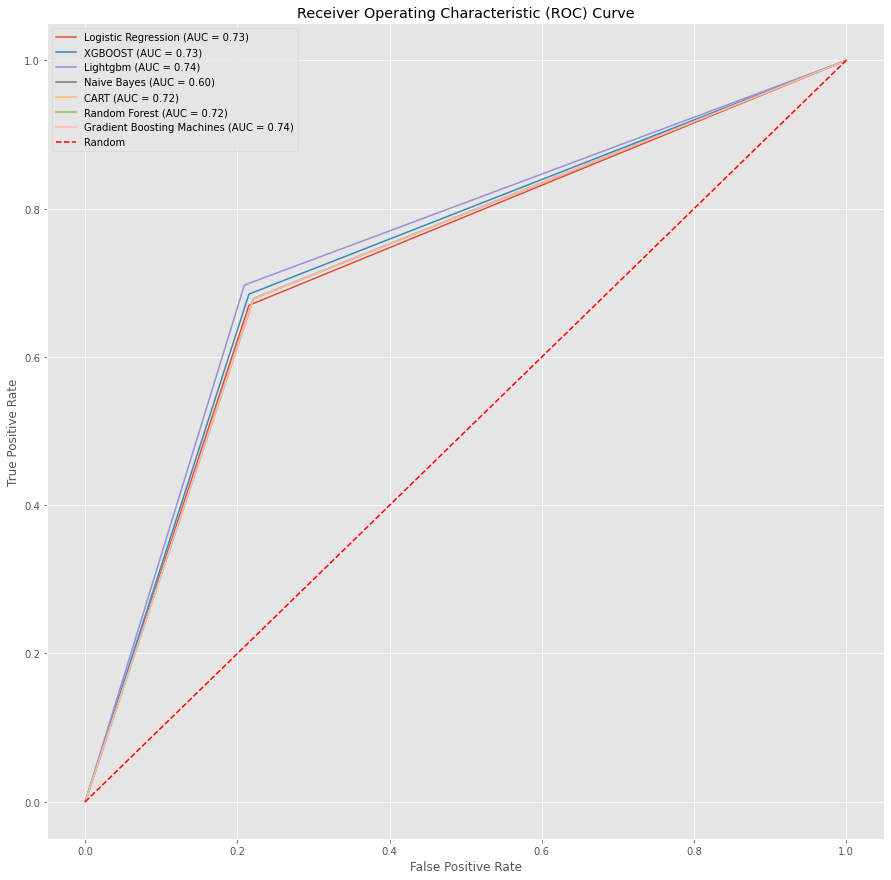

In [91]:
plt.figure(figsize=(15,15))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(xg_fpr, xg_tpr, label=f'XGBOOST (AUC = {xg_auc:.2f})')
plt.plot(lig_fpr, lig_tpr, label=f'Lightgbm (AUC = {lig_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'Naive Bayes (AUC = {naive_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'CART (AUC = {cart_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'Gradient Boosting Machines (AUC = {gbm_auc:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

,Models,Accuracy
0,LogisticRegression,72.73
1,XGBClassifier,73.48
2,LGBMClassifier,74.39
3,SVC,72.88
4,GaussianNB,60.30
5,DecisionTreeClassifier,62.58
6,RandomForestClassifier,72.42
7,GradientBoostingClassifier,73.64


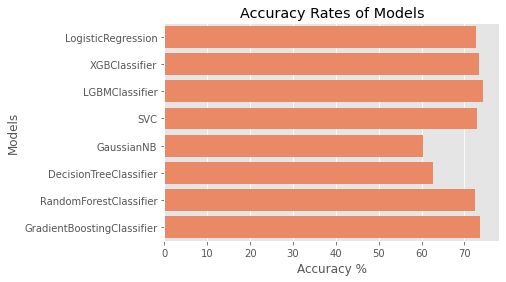

In [92]:
Models= [logmodel,xgb_tuned, lgbm_tuned, svc_model_rbf, naive_model, cart_model, rf_tuned, gbm_tuned]

result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in Models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result, ignore_index=True).round(2)
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="#FF7F50")
plt.xlabel('Accuracy %')
plt.title('Accuracy Rates of Models')

results